# Test Notebook for Deep Learining FrameWork

In [1]:
# clone git repo
!git clone https://github.com/argman/EAST.git

Cloning into 'EAST'...
remote: Enumerating objects: 270, done.
remote: Total 270 (delta 0), reused 0 (delta 0), pack-reused 270
Receiving objects: 100% (270/270), 2.00 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import shutil

In [4]:
shutil.copy('/content/drive/My Drive/east_icdar2015_resnet_v1_50_rbox.zip', '/content/EAST')

'/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip'

In [5]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	# zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 

Extracting all the files now...
Done!


In [6]:
cd /content/EAST

/content/EAST


In [0]:
checkpoint_path = '/content/east_icdar2015_resnet_v1_50_rbox/'

In [8]:
cd /content/

/content


In [0]:
# object croping using bounding boxes
import cv2
import os
import numpy as np

In [0]:
newFolder = '/content/test'

In [0]:
if not os.path.exists(newFolder):
  os.makedirs(newFolder)

In [13]:
# number of files sub-dir
cd /content/test

/content/test


In [14]:
# number of files in sub-dir
!ls

books.jpg


In [16]:
cd /content/EAST

/content/EAST


In [19]:
!python eval.py --test_data_path=/content/ --gpu_list=0 --checkpoint_path=/content/east_icdar2015_resnet_v1_50_rbox/ \
--output_dir=/content/output/

make: Entering directory '/content/EAST/lanms'
make: 'adaptor.so' is up to date.
make: Leaving directory '/content/EAST/lanms'
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0115 18:13:14.736339 140571515303808 module_wrapper.py:139] From eval.py:136: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


W0115 18:13:14.736927 140571515303808 module_wrapper.py:139] From eval.py:137: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0115 18:13:14.737965 140571515303808 module_wrapper.py:139] From eval.py:138: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

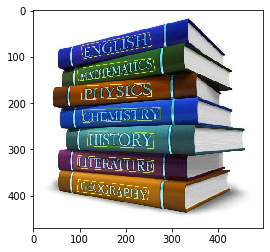

In [18]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("/content/books.jpg")
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)

In [0]:
# save crop objects
newFolder = '/content/crop_img'

if not os.path.exists(newFolder):
  os.makedirs(newFolder)

In [21]:
cd /content/crop_img

/content/crop_img


In [22]:
for filename in os.listdir('/content/output/'):
  # if filename.endswith(('jpeg','jpg','png','tif'))
  
  if filename.endswith(('txt')):
    with open(os.path.join('/content/output/', filename), 'r') as f:
      index = 0
      for line in f:
        img = cv2.imread(os.path.join('/content/output/', 'books.jpg'))
        coords_list = line.strip().split(',')
        coords = list(map(int, coords_list))

        x1 = coords[0]
        y1 = coords[1]
        x2 = coords[2]
        y2 = coords[3]
        x3 = coords[4]
        y3 = coords[5]
        x4 = coords[6]
        y4 = coords[7]

        top_left_x = min([x1,x2,x3,x4])
        top_left_y = min([y1,y2,y3,y4])
        bot_right_x = max([x1,x2,x3,x4])
        bot_right_y = max([y1,y2,y3,y4])



        print(top_left_x, top_left_y, bot_right_x, bot_right_y)

        img = img[top_left_y:bot_right_y, top_left_x:bot_right_x]


        cv2.imwrite('img_'+str(index)+'.jpg',img)

        index += 1
      f.close()

117 260 261 298
95 313 261 351
95 103 263 152
103 157 256 193
103 48 256 105
106 210 274 242
95 365 250 409


In [23]:
cd /content

/content


In [24]:
# Writing zipfile
# importing required modules 
from zipfile import ZipFile 
import os 

def get_all_file_paths(directory): 

	# initializing empty file paths list 
	file_paths = [] 

	# crawling through directory and subdirectories 
	for root, directories, files in os.walk(directory): 
		for filename in files: 
			# join the two strings in order to form the full filepath. 
			filepath = os.path.join(root, filename) 
			file_paths.append(filepath) 

	# returning all file paths 
	return file_paths		 

def main(): 
	# path to folder which needs to be zipped 
	directory = '/content/crop_img'

	# calling function to get all file paths in the directory 
	file_paths = get_all_file_paths(directory) 

	# printing the list of all files to be zipped 
	print('Following files will be zipped:') 
	for file_name in file_paths: 
		print(file_name) 

	# writing files to a zipfile 
	with ZipFile('crop_img.zip','w') as zip: 
		# writing each file one by one 
		for file in file_paths: 
			zip.write(file) 

	print('All files zipped successfully!')		 


if __name__ == "__main__": 
	main() 


Following files will be zipped:
/content/crop_img/img_6.jpg
/content/crop_img/img_5.jpg
/content/crop_img/img_0.jpg
/content/crop_img/img_2.jpg
/content/crop_img/img_3.jpg
/content/crop_img/img_4.jpg
/content/crop_img/img_1.jpg
All files zipped successfully!
